In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

data_origin = loadmat('data/ex6data1.mat')
data_origin

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

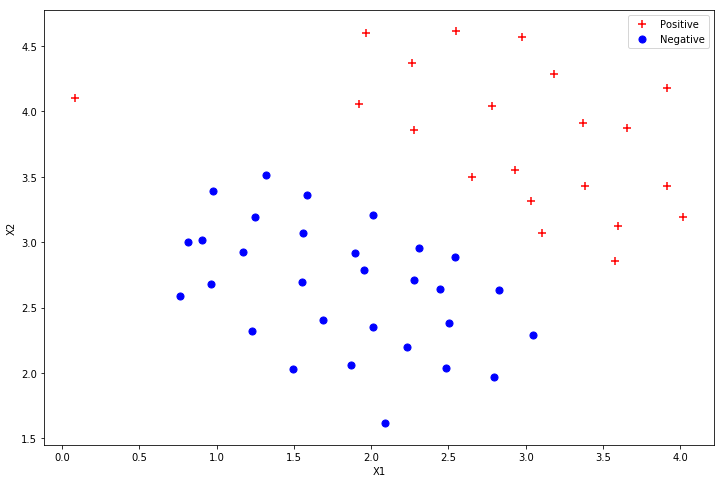

In [20]:
data = pd.DataFrame(data_origin['X'], columns=['X1', 'X2'])
data['y'] = data_origin['y']

Positive = data[data['y'].isin([1])]
Negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(Positive['X1'], Positive['X2'], marker='+', s = 50, c ='r', label ='Positive')
ax.scatter(Negative.X1, Negative.X2, marker='o', s=50, c='b', label = 'Negative')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc=1);

In [21]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [22]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [23]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
svc2.fit(data[['X1', 'X2']], data['y'])  
svc2.score(data[['X1', 'X2']], data['y']) 

1.0

Text(0.5,1,'SVM (C=1) Confidence Level')

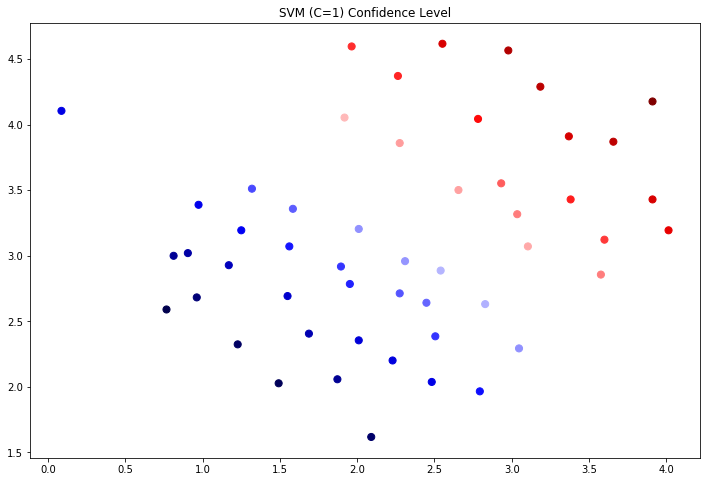

In [24]:
data['SVM1_Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1_Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Confidence Level')

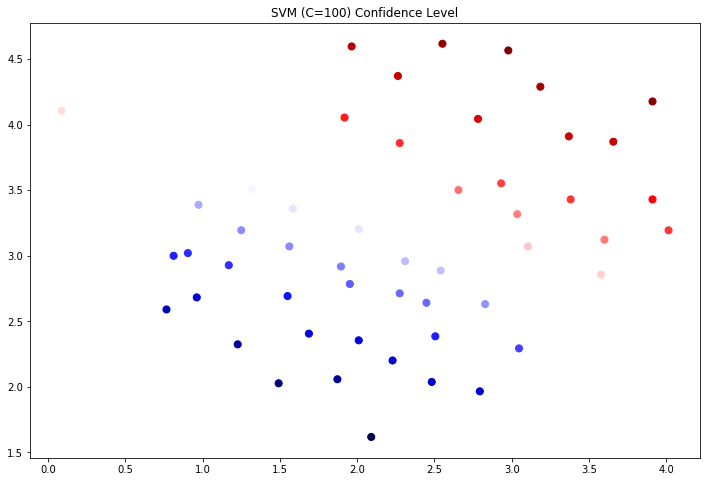

In [25]:
data['SVM2_Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM2_Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Confidence Level');

In [26]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma **2))))

x1 = np.array([1.0, 2.0, 1.0])  
x2 = np.array([0.0, 4.0, -1.0])  
sigma = 2  
gaussian_kernel(x1, x2, sigma) 

0.32465246735834974

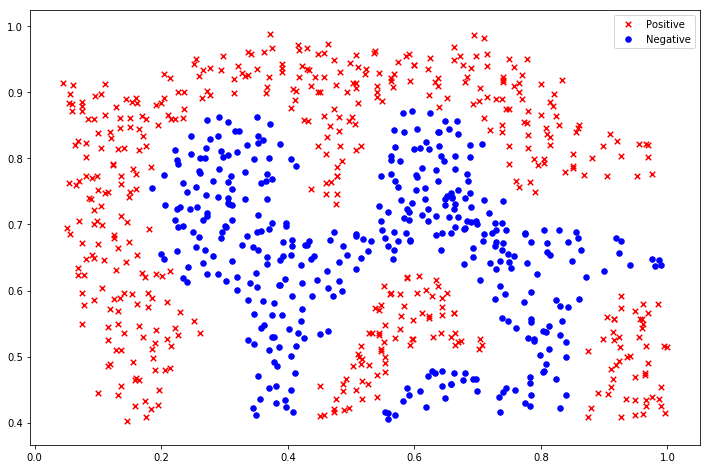

In [28]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, c='r', marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, c='b', marker='o', label='Negative')  
ax.legend();

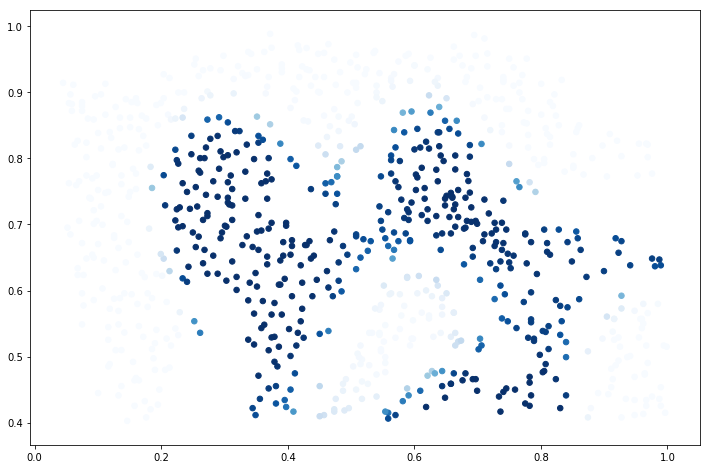

In [29]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Blues'); 

In [30]:
svc.score(data[['X1', 'X2']], data['y']) 

0.9698725376593279

In [45]:
raw_data = loadmat('data/ex6data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

Best_score = 0
Best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C = C, gamma = gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > Best_score:
            Best_score = score
            Best_params = {'C': C, 'gamma': gamma}
    
Best_score, Best_params    
            
        

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [48]:
spam_train = loadmat('data/spamTrain.mat')  
spam_test = loadmat('data/spamTest.mat')

spam_train 

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [49]:
X = spam_train['X']  
Xtest = spam_test['Xtest']  
y = spam_train['y'].ravel()  
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [50]:
svc = svm.SVC()
svc.fit(X, y)
svc.score(Xtest, ytest)

0.95299999999999996

In [57]:
print("Accuracy = {}%".format(np.round(svc.score(Xtest, ytest)*100, 2)))

Accuracy = 95.3%
